In [1]:
# Importing Libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Downloading Data From Internet
filename = 'covid-data.csv'
data_url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
data_content = requests.get(data_url).content
csv_file = open(filename, 'wb')
csv_file.write(data_content)
csv_file.close()

In [2]:
# Importing Data
filename = 'covid-data.csv'
df = pd.read_csv(filename)
print(df.columns)
print(df.shape)

Index(['iso_code', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cvd_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_100k'],
      dtype='object')
(19288, 32)


          Country  Total Cases  Total Deaths
0   United States      1601434         96007
1          Brazil       330890         21048
2          Russia       326448          3249
3  United Kingdom       254195         36393
4           Spain       234824         28628
5           Italy       228658         32616
6         Germany       177850          8216
7          Turkey       154500          4276
8          France       144566         28289
9            Iran       131652          7300


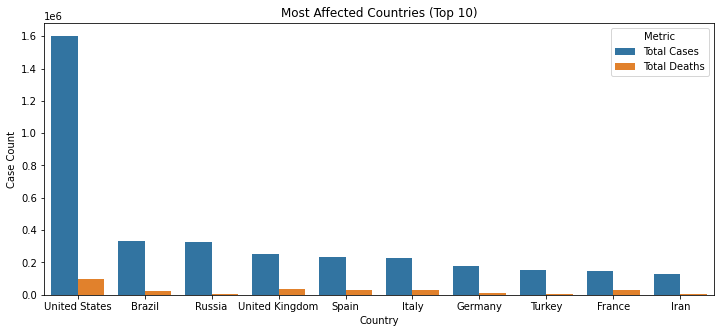

In [3]:
# Most Affected Countries

total_cases = df.groupby('location')['new_cases'].sum()
total_cases = total_cases.sort_values(ascending=False)

most_affected_countries = total_cases[1:11].index # Top 10 Most Affected Countries

cases = total_cases[1:11].values # Number of Cases in Top 10 Countries 

total_deaths = df.groupby('location')['new_deaths'].sum()
deaths = total_deaths[most_affected_countries].values # Number of Deaths in Top 10 Countries

cases_deaths_df = pd.DataFrame({'Country': most_affected_countries, 'Total Cases': cases, 'Total Deaths': deaths})
print(cases_deaths_df)

plot_data = pd.melt(cases_deaths_df, id_vars = ['Country'], value_vars=['Total Cases', 'Total Deaths'], 
                    var_name='Metric', value_name='Case Count') # Plot Friendly Format
plt.figure(figsize=(12, 5))
sns.barplot(x="Country", hue="Metric", y="Case Count", data=plot_data)
plt.title('Most Affected Countries (Top 10)')
plt.show()

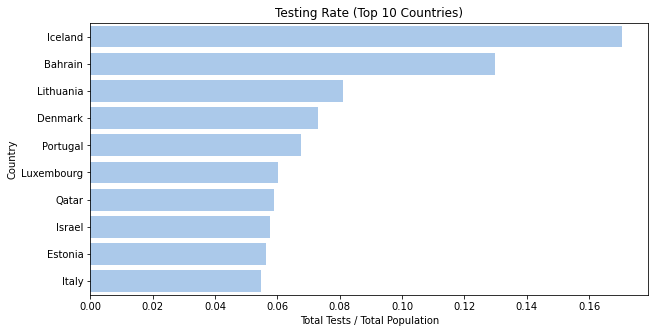

In [4]:
# Testing Rate
total_tests = df.groupby('location')['new_tests'].sum().values
population = df.groupby('location')['population'].nth(-1)
testing_rate = (total_tests/population).sort_values(ascending = False)[:10]

plt.figure(figsize=(10, 5))
sns.set_color_codes("pastel")
sns.barplot(y = testing_rate.index, x = testing_rate.values, orient = "h", color="b")
plt.title('Testing Rate (Top 10 Countries)')
plt.xlabel('Total Tests / Total Population')
plt.ylabel('Country')
plt.show()

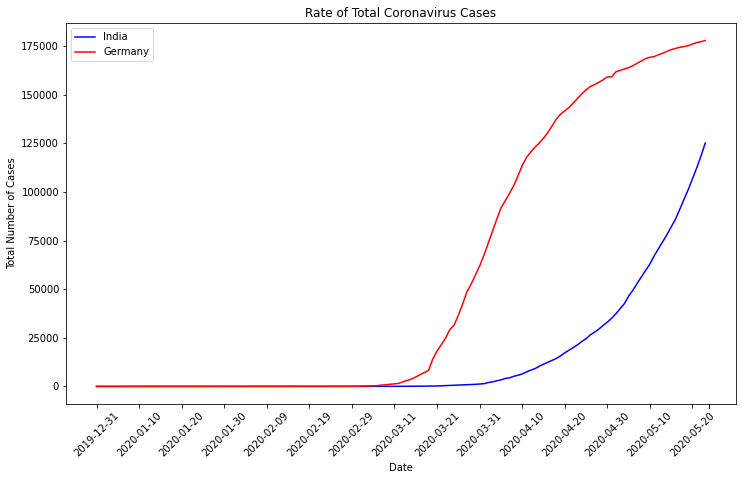

In [5]:
# Compare rate of increase of cases between two countries
country1 = 'India'
country1_data = df.loc[df['location'] == country1]
country1_cases = country1_data[['date','total_cases']]

country2 = 'Germany'
country2_data = df.loc[df['location'] == country2]
country2_cases = country2_data[['date','total_cases']]

datewise_cases = country1_cases.merge(country2_cases, how = 'inner', on = 'date') 
print(datewise_cases.tail())

plt.figure(figsize=(12, 7))
plt.plot(datewise_cases['date'].values, datewise_cases['total_cases_x'].values, color='blue', label=country1)
plt.plot(datewise_cases['date'].values, datewise_cases['total_cases_y'].values, color='red', label=country2)
plt.xticks([datewise_cases['date'][i] if i%10 == 0 else '' for i in range(len(datewise_cases.index))], rotation = 45)
plt.xlabel('Date')
plt.ylabel('Total Number of Cases')
plt.title('Rate of Total Coronavirus Cases')
plt.legend()
plt.show()

          Country  Total Cases  Population Density  Median Age  \
0   United States      1601434              35.608        38.3   
1          Brazil       330890              25.040        33.5   
2          Russia       326448               8.823        39.6   
3  United Kingdom       254195             272.898        40.8   
4           Spain       234824              93.105        45.5   

   Diabetes Prevelance  Stringency Index  Cardiovascular Death Rate  \
0                10.79         35.349716                    151.089   
1                 8.11         36.274929                    177.961   
2                 6.18         37.912806                    431.297   
3                 4.28         37.469645                    122.137   
4                 7.17         45.670775                     99.403   

   Aged 70 or Older  
0             9.732  
1             5.060  
2             9.393  
3            12.527  
4            13.799  


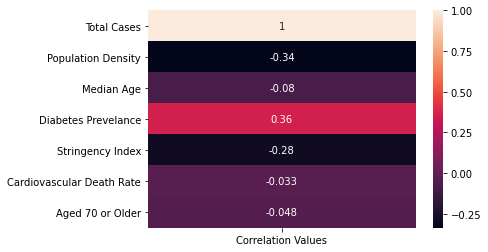

In [12]:
# Correlations of Top 10 Countries
# Number of Cases vs Population Density, Median Age, Diabetes Prevelance, Stringency Index, CVD Death Rate, Aged 70 or Older
df_corr = pd.DataFrame(most_affected_countries.values, columns = ['Country'])
df_corr['Total Cases'] = cases

pop_density = df.groupby('location')['population_density'].nth(-1)
df_corr['Population Density'] = pop_density[most_affected_countries].values

median_age = df.groupby('location')['median_age'].nth(-1)
df_corr['Median Age'] = median_age[most_affected_countries].values

diabetes_prevalence = df.groupby('location')['diabetes_prevalence'].nth(-1)
df_corr['Diabetes Prevelance'] = diabetes_prevalence[most_affected_countries].values

stringency_index = df.groupby('location')['stringency_index'].mean()
df_corr['Stringency Index'] = stringency_index[most_affected_countries].values

cvd_death_rate = df.groupby('location')['cvd_death_rate'].nth(-1)
df_corr['Cardiovascular Death Rate'] = cvd_death_rate[most_affected_countries].values

aged_70_older = df.groupby('location')['aged_70_older'].nth(-1)
df_corr['Aged 70 or Older'] = aged_70_older[most_affected_countries].values

print(df_corr.head())

heatmap_df = pd.DataFrame({'Correlation Values': df_corr.corr()['Total Cases'].values}, index = df_corr.corr()['Total Cases'].index)
sns.heatmap(heatmap_df, annot=True)
plt.show()